In [ ]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

: 

In [2]:
value_df = pd.read_csv("in/animation/0-0-ConstFourrooms-v0.csv", index_col=0)

In [3]:
value_df

,state,v,v_z,z,episode,step
0,0,0.000000,0.000000,0,0,0
1,0,0.000000,0.000000,0,0,1
2,0,0.000000,0.000000,0,0,2
3,1,0.000000,0.000000,0,0,3
4,2,0.000000,0.000000,0,0,4
...,...,...,...,...,...,...
999059,70,0.830357,0.947407,2,999,59
999060,80,0.901973,0.947407,2,999,60
999061,81,0.944239,0.947407,2,999,61
999062,92,0.970518,0.947407,2,999,62


In [76]:
group_value_df = value_df.groupby(["episode", "state"]).agg({"v":max, "v_z":max})
group_value_df

v       v_z
episode state                    
0       0      0.000000  0.000000
        1      0.000000  0.000000
        2      0.000000  0.000000
        3      0.000000  0.000000
        4      0.000000  0.000000
...                 ...       ...
999     70     0.830357  0.947407
        80     0.901973  0.947407
        81     0.944239  0.947407
        92     0.970518  0.947407
        102    0.990928  0.410933

[42171 rows x 2 columns]

<IPython.core.display.Javascript object>


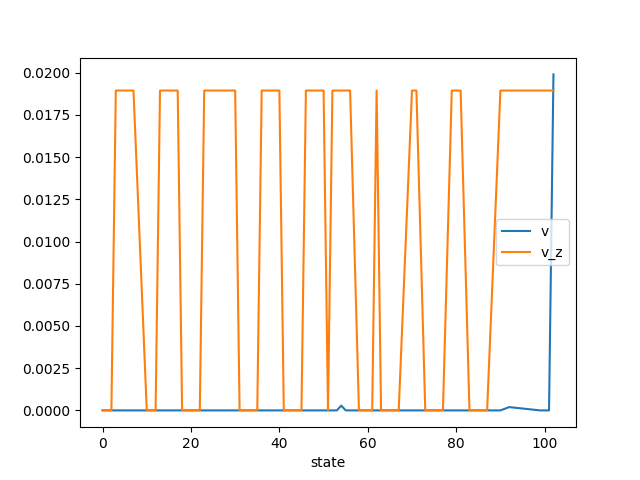

<AxesSubplot:xlabel='state'>

In [77]:
group_value_df.xs(4, level="episode").plot()

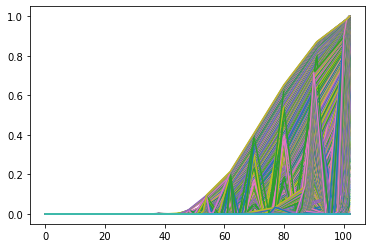

<IPython.core.display.Javascript object>


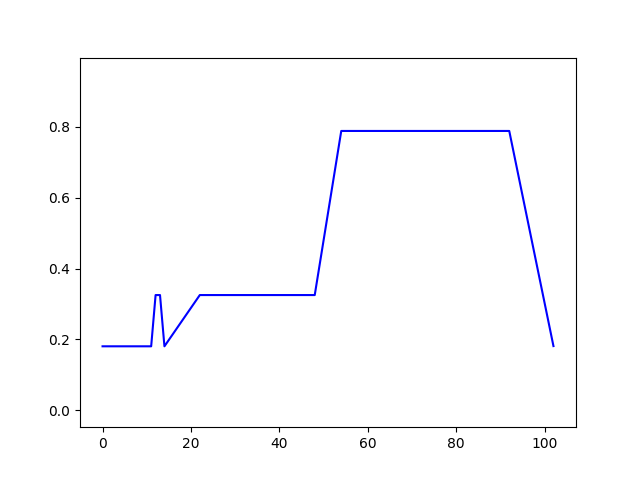

In [78]:
fig = plt.figure()
graphs = []
for i in range(1000):
    im = plt.plot(group_value_df["v_z"].xs(i, level="episode"), color='b')
    graphs.append(im)
ani = animation.ArtistAnimation(fig, graphs, interval=100)
# ani.save("output.gif", writer="imagemagick")
plt.show()

In [4]:
v_z_df = value_df.groupby(["episode"]).agg({"z": lambda x: len(set(x))})  # .agg({"v_z":max})
target_index = v_z_df[v_z_df["z"] == 3].index.tolist()

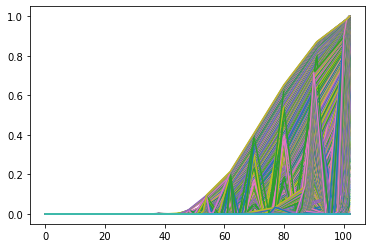

<IPython.core.display.Javascript object>


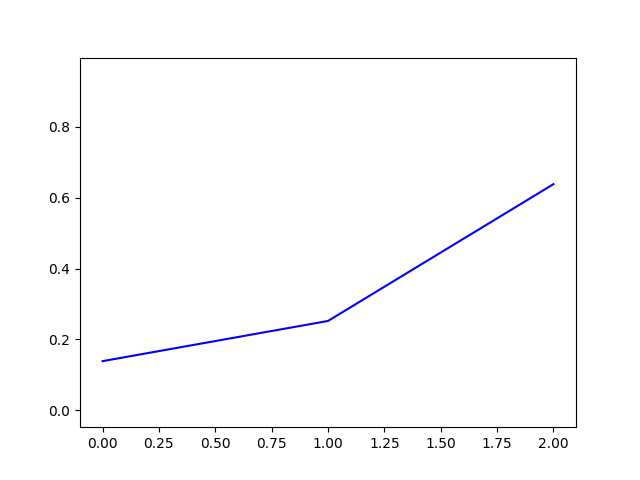

In [75]:
fig = plt.figure()
graphs = []
for i in range(1000):
    im = plt.plot(v_z_df["v_z"].xs(i, level="episode"), color='b')
    graphs.append(im)
ani = animation.ArtistAnimation(fig, graphs, interval=100)
# ani.save("output.gif", writer="imagemagick")
plt.show()

In [79]:
v_z_df

v_z
episode z          
0       0  0.000000
        1  0.000000
        2  0.000000
1       0  0.000000
        1  0.000000
...             ...
998     1  0.662377
        2  0.947371
999     0  0.410933
        1  0.664408
        2  0.947407

[2783 rows x 1 columns]

In [6]:
# サブゴールを2つ達成したエピソードに限定する。
target_value_df = value_df[value_df["episode"].isin(target_index)]
target_value_df

,state,v,v_z,z,episode,step
0,0,0.000000,0.000000,0,0,0
1,0,0.000000,0.000000,0,0,1
2,0,0.000000,0.000000,0,0,2
3,1,0.000000,0.000000,0,0,3
4,2,0.000000,0.000000,0,0,4
...,...,...,...,...,...,...
999059,70,0.830357,0.947407,2,999,59
999060,80,0.901973,0.947407,2,999,60
999061,81,0.944239,0.947407,2,999,61
999062,92,0.970518,0.947407,2,999,62


In [7]:
v_z_df = target_value_df.groupby(["episode", "z"]).agg({"v_z":max})
v_z_df

v_z
episode z          
0       0  0.000000
        1  0.000000
        2  0.000000
1       0  0.000000
        1  0.000000
...             ...
998     1  0.662377
        2  0.947371
999     0  0.410933
        1  0.664408
        2  0.947407

[2586 rows x 1 columns]

In [13]:
v_z = v_z_df.unstack(level=-1).to_numpy()
print(len(v_z))
v_z

862


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.97097786e-04],
       [1.48458852e-05, 1.98484178e-06, 9.52829928e-03],
       ...,
       [3.49204227e-01, 5.87393866e-01, 9.44173029e-01],
       [3.50634191e-01, 5.89805244e-01, 9.44241199e-01],
       [3.50634191e-01, 5.92193107e-01, 9.44308687e-01]])

In [9]:
fig = plt.figure()
graphs = []

for v_0, v_1, v_2 in v_z:
    series1 = np.full(5, v_0)
    series2 = np.full(5, v_1)
    series3 = np.full(5, v_2)
    y = np.hstack([series1, series2, series3])
    x = np.arange(15)
    im = plt.bar(x, y, color='#0387b1')
    graphs.append(im)

ani = animation.ArtistAnimation(fig, graphs, interval=10)
ani.save("dynamic_potential.gif", writer="imagemagick")
# plt.show()

<IPython.core.display.Javascript object>

MovieWriter stderr:
convert-im6.q16: DistributedPixelCache '127.0.0.1' @ error/distribute-cache.c/ConnectPixelCacheServer/244.
convert-im6.q16: cache resources exhausted `-' @ error/cache.c/OpenPixelCache/3984.
convert-im6.q16: no images defined `dynamic_potential.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '640x480', '-depth', '8', '-delay', '1.0', '-loop', '0', 'rgba:-', 'dynamic_potential.gif']' returned non-zero exit status 1.